In [1]:
%matplotlib inline
import numpy as np
from forschungspraktikum.jiles_atherton.functions import jiles_atherton_H, jiles_atherton_B, langevin, grad_langevin
from scipy.constants import mu_0
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.00016
a = 29.25-10
Msat = 387000
k = 30.0
c = 0.4

params = [alpha, a, Msat, k, c]
# Eingangsgrößen
r = 2.0e-2 # m, Radius
i_hat = 15.0 # A, Strom
f = 1.0 # Hz, Frequenz
n = 5 # Anzahl Perioden
n_p = 512# Datenpunkte pro Periode
t = np.arange(n * n_p)/(n_p*f) # Zeitvektor

In [13]:
B = 0.1*(np.sin(2*np.pi*f*t + np.pi/2) + 0.01*np.random.normal(0.0, 1.0, int(t.size)))
f_b, f_a = signal.bessel(6, 0.05, 'low')
B = signal.lfilter(f_b, f_a, B)


M = np.zeros(B.size)
H = np.zeros(B.size)

In [14]:
for i, item in enumerate(B):
    dB = B[i] - B[i-1]
    M[i-1] = B[i-1]/mu_0 - H[i-1]
    He = H[i-1] + alpha*M[i-1]
    Man = Msat * langevin(He/a)
    Mirr = (M[i-1] - c*Man)/(1 - c)
    dMan_dHe = Msat/a*grad_langevin(He/a)
    dMirr_dBe = (Man-Mirr)/(mu_0*k*np.sign(dB))
    dM_dB = ((1-c)*dMirr_dBe + c/mu_0 * dMan_dHe)/(1 + mu_0 * (1-alpha)*(1-c)*dMirr_dBe + c*(1-alpha)*dMan_dHe)
    print(dM_dB)
    M[i] = M[i-1] + dM_dB*dB
    H[i] = B[i]/mu_0 - M[i]

795567.2708773861
796341.1645627068
796341.1587474276
796341.1262715496
796341.0050219903
796340.6600649339
796339.8538981003
796338.2306768631
796335.3252701896
796330.6063218877
796323.5570248779
796313.784599401
796301.1310986987
796285.7448461851
796268.0781599297
796248.8064685508
796228.6995960794
796208.4932257704
796188.7982335199
796170.0604694312
796152.5623130697
796136.4486304374
796121.7613070332
796108.4722589237
796096.51032701
796085.7810824394
796076.1803638082
796067.602951099
796059.9477510933
796053.1206103305
796047.0355807149
796041.6152176453
796036.7903079895
796032.4992938018
796028.6875616043
796025.3066990149
796022.3137760923
796019.6706804443
796017.3435170122
796015.3020729682
796013.5193433972
796011.9711119771
796010.6355817223
796009.4930532954
796008.5256495273
796007.7170822653
796007.0524542677
796006.5180888003
796006.1013825833
796005.7906810178
796005.5751767877
796005.4448325179
795827.5556396979
795827.5525677216
795827.5351676935
795827.5052744

795967.7472140114
795967.5891503687
795967.4333434966
795967.2797578775
795967.1283507741
795966.9790752645
795966.8318823434
795966.6867222823
795966.5435456198
795966.4023038939
795966.2629501543
795966.1254391494
795965.989727004
795965.8557706869
795965.723528108
795965.5929593713
795965.4640288821
795965.3367074032
795965.2109733057
795965.086812977
795964.9642208238
795964.8431991226
795964.7237575492
795964.6059123013
795964.4896852174
795964.3751034106
795964.2621994192
795964.1510113641
795964.0415825462
795963.9339602055
795963.82819327
795963.7243290233
795963.6224090306
795963.5224650603
795963.4245157174
795963.3285644212
795963.2345990841
795963.1425932649
795963.0525081141
795962.9642947286
795962.8778971839
795962.7932565316
795962.7103153885
795962.6290222922
795962.5493351425
795962.4712235882
795962.3946705471
795962.3196728586
795962.2462409688
795962.1743977555
795962.1041766261
795962.0356190234
795961.9687717273
795961.9036843404
795961.8404069626
795961.77898802

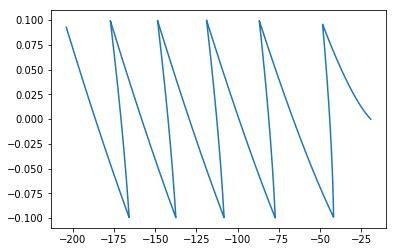

In [15]:
plt.plot(H, B)

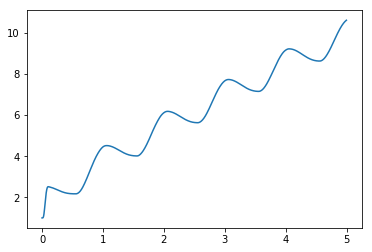

In [16]:
plt.plot(t, H/np.max(H))

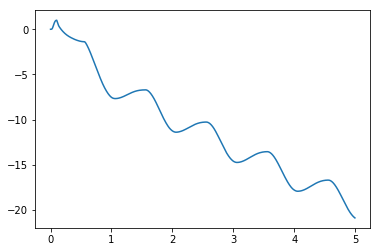

In [17]:
H_ = jiles_atherton_B(B, t, params)
plt.plot(t[::2], H_/np.max(H_))